Es el momento de ponernos manos a la obra. En esta lección ajustaremos nuestro primer modelo de regresión logística. Don't panic! Las cosas no cambian mucho, y usaremos la misma lógica que ya aprendimos con la regresión lineal como:
-Separar la X de la y
-Crear el set de datos de entrenamiento y de test
-Ajustar el modelo usando el método .fit()

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [26]:
df = pd.read_pickle('datos/airline_cod.pkl')
df.head(5)

,satisfaccion,genero,tipo_de_cliente,clase,comfort_asiento,comida_y_bebida,ubicación_puerta_embarque,ocio_vuelo,soporte_online,facilidad_reserva_online,servicio_durante_el_vuelo,manejo_equipaje,facturacion,limpieza,embarque_online,retraso_salida_minutos,puntualidad_Insatisfecho,puntualidad_Muy satisfecho,puntualidad_Nada satisfecho,puntualidad_Neutral,puntualidad_Poco Satisfecho,puntualidad_Satisfecho
0,satisfied,1,1,2,1,1,1,1,2,2,2,2,1,2,2,0,0,0,1,0,0,0
1,satisfied,2,1,1,1,1,3,2,2,2,1,1,2,2,2,310,0,0,1,0,0,0
2,satisfied,1,1,2,1,1,3,0,2,2,2,1,1,1,2,0,0,0,1,0,0,0
3,satisfied,1,1,2,1,1,3,1,2,2,2,2,1,2,1,0,0,0,1,0,0,0
4,satisfied,1,1,2,1,1,3,2,1,2,2,2,1,2,1,0,0,0,1,0,0,0


In [27]:
map_satisfaccion = {'satisfied':0,'dissatisfied':1}

In [28]:
df['satisfaccion']=df['satisfaccion'].map(map_satisfaccion)

In [29]:
#Separamos x e y
X1 = df.drop("satisfaccion", axis = 1)
y1 = df["satisfaccion"]

In [30]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.2, random_state = 42)

In [31]:
os_us = SMOTETomek()
X_train_res, y_train_res = os_us.fit_resample(x_train1, y_train1)

In [32]:
os_us = SMOTETomek()
X_test_bal, y_test_bal = os_us.fit_resample(x_test1, y_test1)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
log_reg_esta = LogisticRegression(n_jobs=-1, max_iter = 1000)

log_reg_esta.fit(X_train_res,y_train_res)

y_pred_train_esta = log_reg_esta.predict(X_train_res)

y_pred_test_esta = log_reg_esta.predict(X_test_bal)

In [35]:
train_df_esta = pd.DataFrame({'Real': y_train_res, 'Predicted': y_pred_train_esta, 'Set': ['Train']*len(y_train_res)})
test_df_esta  = pd.DataFrame({'Real': y_test_bal,  'Predicted': y_pred_test_esta,  'Set': ['Test']*len(y_test_bal)})
resultados = pd.concat([train_df_esta,test_df_esta], axis = 0)
resultados.head()

,Real,Predicted,Set
0,0,0,Train
1,1,1,Train
2,1,0,Train
3,1,1,Train
4,1,1,Train


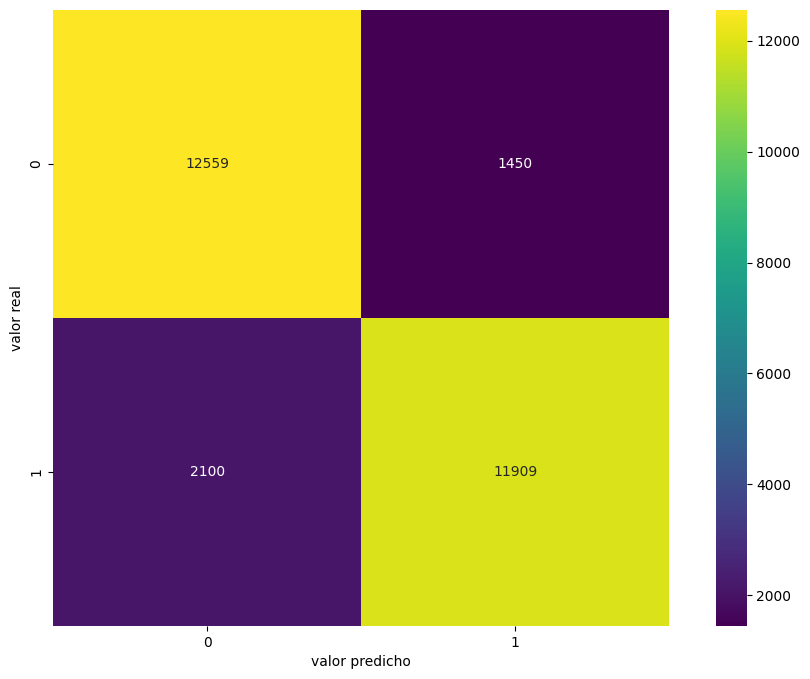

In [36]:
mat_lr = confusion_matrix(y_test_bal, y_pred_test_esta)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr, square=True, annot=True, fmt="d", cmap = "viridis")

plt.xlabel('valor predicho')
plt.ylabel('valor real')
plt.show()

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score , cohen_kappa_score, roc_curve,roc_auc_score

In [38]:
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [39]:
results_logistic = metricas(y_test_bal, y_pred_test_esta, y_train_res, y_pred_train_esta, "Regresión logistica")
results_logistic

,accuracy,precision,recall,f1,kapppa,set,modelo
0,0.873296,0.891459,0.850096,0.870286,0.746591,test,Regresión logistica
1,0.869287,0.884043,0.850075,0.866726,0.738573,train,Regresión logistica
